In [1]:
from obspy import read
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from obspy.signal.freqattributes import spectrum
import numpy as np

stream = read('BW.RJOB.2009.08.mseed')
stream_filt = stream.copy()
stream_filt.detrend(type='demean')
stream_filt.filter('highpass', freq=1, corners=2, zerophase=True)

# Determine component of the channel
for i in range(len(stream_filt)):
    if stream_filt[i].stats.channel[2] == 'E':
        ECOM = stream_filt[i]
    elif stream_filt[i].stats.channel[2] == 'N':
        NCOM = stream_filt[i]
    else:
        ZCOM = stream_filt[i]

print(ZCOM)

BW.RJOB..EHZ | 2009-08-24T00:20:03.000000Z - 2009-08-24T00:20:32.990000Z | 100.0 Hz, 3000 samples


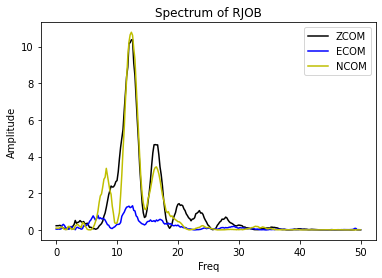

In [4]:
ECOM = stream_filt.select(component='E')
NCOM = stream_filt.select(component='N')
ZCOM = stream_filt.select(component='Z')


spectrum
ZCOM = ZCOM[0]
ECOM = ECOM[0]
NCOM = NCOM[0]
DATA = [ZCOM,ECOM,NCOM]
xfdata_x = []
fftdata_y = []
for DATA in DATA:
    signaldata = DATA.data
    win = np.hanning(len(signaldata))
    Fs = DATA.stats.sampling_rate
    freqdata = spectrum(DATA.data, win, 512, n1=0, n2=0)
    xfdata = np.linspace(0.0, 1.0 / (2.0 * (1 / Fs)), len(freqdata) // 2)
    fftdata = 2.0 / len(freqdata) * np.abs(freqdata[0:len(freqdata) // 2])
    xfdata_x.append(xfdata)
    fftdata_y.append(fftdata)
colors = ['k','b','y']
for i in range(3):
    plt.plot(xfdata_x[i], fftdata_y[i], color=colors[i])
plt.title('Spectrum of ' + DATA.stats.station)
plt.xlabel('Freq')
plt.ylabel('Amplitude')
plt.legend(['ZCOM','ECOM','NCOM'])
# plt.xscale('log', base=10)
# plt.yscale('log', base=10)
plt.show()



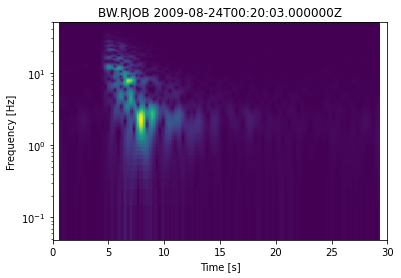

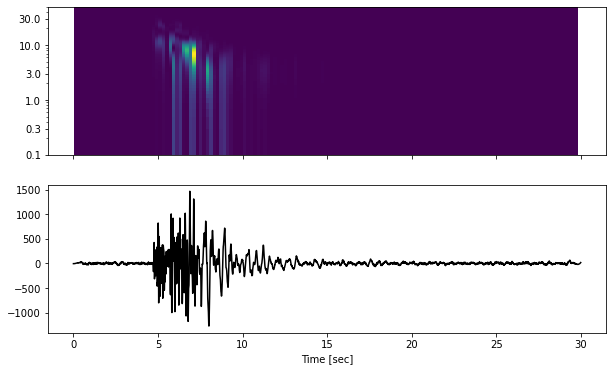

In [6]:
ZCOM.spectrogram(log=True, title='BW.RJOB ' + str(stream[0].stats.starttime))
# STATS data, delta time and sampling rate
station = ZCOM.stats.station
dt = ZCOM.stats.delta
sr = ZCOM.stats.sampling_rate
start = ZCOM.stats.starttime
npts = ZCOM.stats.npts
time = ZCOM.times()

# scipy spectogram
frequencies, times, spectrogram = signal.spectrogram(ZCOM.data,sr, window='hamming', nfft=512, nperseg=25, noverlap=5)
fig, ax = plt.subplots(2, 1, figsize=[10, 6], sharex=True)
ax[0].pcolormesh(times, frequencies, spectrogram, shading='auto')
ax[1].plot(ZCOM.times(), ZCOM.data, '-k')
ax[0].set_yscale('log', base=10)
ax[0].set_ylim(0.1, 50)
ax[0].set_yticks([0.1, 0.3, 1, 3, 10, 30])
ax[0].get_yaxis().set_major_formatter(tick.ScalarFormatter())
plt.xlabel('Time [sec]')
plt.show()

